<a href="https://colab.research.google.com/github/sherlockholmes878/Analysis/blob/main/Tesla_Stock_Market_Prediction_Using_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the Libraries
import pandas as PD
!pip install pandas numpy matplotlib scikit-learn keras
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
!pip install tensorflow
!pip install keras

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from tensorflow.keras.utils import plot_model

In [51]:
import numpy as np

# Extracting Tesla Stock market data yfinance

In [20]:
!pip install yfinance==0.1.93
!mamba install bs4==4.10.0 -y
!pip install nbformat

#!pip install yfinance==0.1.67
#!pip install nbformat==4.2.0

!python -m pip install yfinance
!python -m pip install pandas
!python -m pip install requests
!python -m pip install bs4
!python -m pip install plotly

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.37
    Uninstalling yfinance-0.2.37:
      Successfully uninstalled yfinance-0.2.37
/bin/bash: line 1: mamba: command not found


In [21]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Define Graphing Function**

In [22]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

**Use yfinance to Extract Stock Data**

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [23]:
data = yf.Ticker('TSLA')
tesla_data = data.history(period='max')
tesla_data.reset_index(inplace=True)

In [24]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [ ]:
tesla_data.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [41]:
df = tesla_data
df

,Date,Open,High,Low,Close,Volume
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...,...
3442,2024-03-04 00:00:00-05:00,198.729996,199.750000,186.720001,188.139999,134334900
3443,2024-03-05 00:00:00-05:00,183.050003,184.589996,177.570007,180.740005,119660800
3444,2024-03-06 00:00:00-05:00,179.990005,181.580002,173.699997,176.539993,107920900
3445,2024-03-07 00:00:00-05:00,174.350006,180.039993,173.699997,178.649994,102129000


# Data Processing

**Checking for Null Values by Printing the DataFrame Shape**

In [42]:
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (3447, 6)
Null Value Present:  False


In [43]:
df.set_index('Date', inplace=True)

**Plotting the True Adjusted Close Value**

The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model. This figure indicates the stock’s closing price on that particular day of stock market trading.

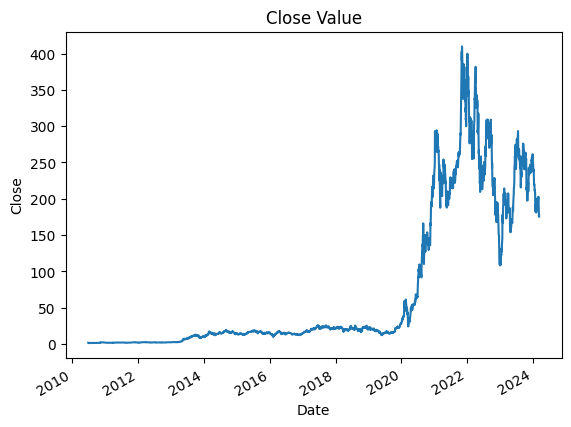

In [44]:
df["Close"].plot()
plt.title('Close Value')
plt.ylabel('Close')
plt.show()

**Setting the Target Variable and Selecting the Features**

output column is then assigned to the target variable in the following step.

we pick the features that serve as the independent variable to the target variable (dependent variable). We choose four characteristics to account for training purposes:

    Open
    High
    Low
    Volume

In [47]:
# Set Target Variable
output_var = pd.DataFrame(df['Close'])

# Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

**Scaling**

 scale the stock values to values between 0 and 1. As a result, all of the data in large numbers is reduced, and therefore memory consumption is decreased.

In [48]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-06-29 00:00:00-04:00,0.000465,0.001350,0.000422,0.306605
2010-06-30 00:00:00-04:00,0.001568,0.002224,0.001371,0.280640
2010-07-01 00:00:00-04:00,0.001439,0.001498,0.000871,0.133184
2010-07-02 00:00:00-04:00,0.001114,0.001043,0.000614,0.082560
2010-07-06 00:00:00-04:00,0.000627,0.000543,0.000140,0.110956


**Creating a Training Set and a Test Set for Stock Market Prediction**

In [49]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

**Data Processing For LSTM**

we must transform the training and test set data into a format that the LSTM model can interpret. As the LSTM needs that the data to be provided in the 3D form, we first transform the training and test data to NumPy arrays and then restructure them to match the format (Number of Samples, 1, Number of Features).

In [52]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

# Building the LSTM Model

Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. For an LSTM model, this is the most preferred combination.

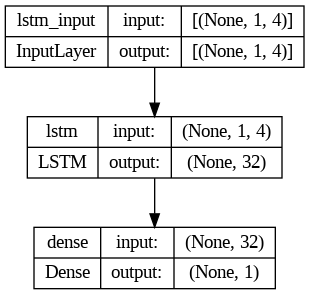

In [54]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='tanh', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer=Adam())
plot_model(lstm, show_shapes=True, show_layer_names=True)

**Training model**

use the fit function to train the LSTM model created above on the training data for 100 epochs with a batch size of 8.

In [55]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
392/392 [==============================] - 4s 3ms/step - loss: 10748.6816
Epoch 2/100
392/392 [==============================] - 1s 3ms/step - loss: 10108.0303
Epoch 3/100
392/392 [==============================] - 1s 3ms/step - loss: 9680.8193
Epoch 4/100
392/392 [==============================] - 1s 3ms/step - loss: 9324.7695
Epoch 5/100
392/392 [==============================] - 2s 4ms/step - loss: 8990.2520
Epoch 6/100
392/392 [==============================] - 1s 3ms/step - loss: 8644.7539
Epoch 7/100
392/392 [==============================] - 1s 3ms/step - loss: 8295.6680
Epoch 8/100
392/392 [==============================] - 1s 3ms/step - loss: 7961.5059
Epoch 9/100
392/392 [==============================] - 1s 4ms/step - loss: 7645.1553
Epoch 10/100
392/392 [==============================] - 1s 3ms/step - loss: 7344.3540
Epoch 11/100
392/392 [==============================] - 1s 4ms/step - loss: 7057.0630
Epoch 12/100
392/392 [==============================] - 1s 3m

# Data Analasis

In [56]:
y_pred = lstm.predict(X_test)

10/10 [==============================] - 1s 3ms/step


Comparing Predicted vs Close Value

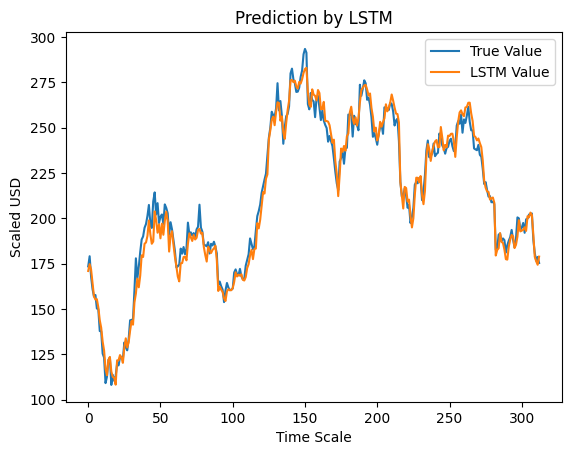

In [57]:
plt.plot(y_test, label='True Value')  # Plotting true values
plt.plot(y_pred, label='LSTM Value')  # Plotting predicted values
plt.title("Prediction by LSTM")  # Setting the title of the plot
plt.xlabel('Time Scale')  # Setting the label for the x-axis
plt.ylabel('Scaled USD')  # Setting the label for the y-axis
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot